In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
xtrain = np.load("./data1/data1_xtrain.npy")
ytrain = np.load("./data1/data1_ytrain.npy")
print(xtrain.shape)
print(ytrain.shape)

xtest = np.load("./data1/data1_xtest.npy")
ytest = np.load("./data1/data1_ytest.npy")
print(xtest.shape)
print(ytest.shape)

(150, 2)
(150, 1)
(150, 2)
(150, 1)


In [3]:
x1 = [ ]
x2 = [ ]

for i in range(0, len(xtrain)):
    for j in range(0,2):
        if j%2==0:
            x1.append(xtrain[i][j])
        else:
            x2.append(xtrain[i][j])


Text(0, 0.5, 'x2')

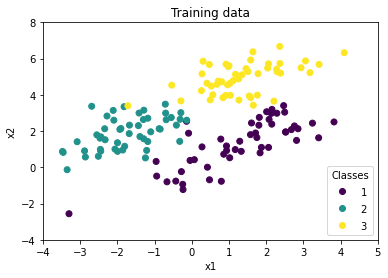

In [4]:
figure, sct = plt.subplots()
scatter = plt.scatter(x1, x2, c = ytrain)
legend1 = sct.legend(*scatter.legend_elements(),
                    loc="lower right", title="Classes")
plt.xlim(-4,5)
plt.ylim(-4,8)
plt.title('Training data')
plt.xlabel('x1')
plt.ylabel('x2')

In [5]:
x1test = [ ]
x2test = [ ]

for i in range(0, len(xtest)):
    for j in range(0,2):
        if j%2==0:
            x1test.append(xtest[i][j])
        else:
            x2test.append(xtest[i][j])


Text(0, 0.5, 'x2test')

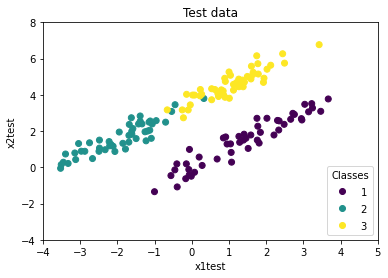

In [6]:
figure, sct = plt.subplots()
scatter = plt.scatter(x1test, x2test, c = ytrain)
legend1 = sct.legend(*scatter.legend_elements(),
                    loc="lower right", title="Classes")
plt.xlim(-4,5)
plt.ylim(-4,8)
plt.title('Test data')
plt.xlabel('x1test')
plt.ylabel('x2test')

# Naive Bayes classifier from scratch

In [17]:
ytrain[149]

array([3.])

In [39]:
class NaiveBayes:
    
    def fit (self, x, y):
        n_samples, n_features = x.shape
        self._classes = np.unique(y)
        n_classes = len(self._classes)
        
        #init mean, var, priors
        self._mean = np.zeros((n_classes, n_features), dtype=np.float64)
        self._var = np.zeros((n_classes, n_features), dtype=np.float64)
        self._priors = np.zeros(n_classes, dtype=np.float64)
        
        for c in self._classes:
            x_c = x[c==y]
            print(x_c)
            self._mean[c,:] = x_c.mean(axis=0)
            self._var[c,:] = x_c.var(axis=0)
            self._priors[c] = x_c.shape[0] / float(n_samples)


    def predict(self, x):
        y_pred = [self._predict(x) for i in x]
        return y_pred
        
    def _predict(self, x):
        posteriors = []
        
        for idx in enumerate(self._classes):
            prior = np.log(self._priors[idx])
            class_conditional = np.sum(np.log(self._pdf, x))
            posterior = prior + class_conditional
            posteriors.append(posterior)
        
        return self._classes(np.argmax(posteriors))
            
    def _pdf(self, class_idx, x):
        mean = self._mean[class_idx]
        var = self._var[class_idx]
        numerator = np.exp(-(x-mean)**2 / (2*var))
        denominator = np.sqrt(2*np.pi * var)
        return numerator / denominator    

In [40]:
nb = NaiveBayes()
nb.fit(xtrain, ytrain)

IndexError: boolean index did not match indexed array along dimension 1; dimension is 2 but corresponding boolean dimension is 1